In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

train_dir = r"C:\Users\ASUS\Downloads\MAD\archive\Train"
test_dir = r"C:\Users\ASUS\Downloads\MAD\archive\Test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

base_model = MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = tf.keras.callbacks.ModelCheckpoint('sign_language_mobilenetv2_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

model.save('sign_language_final_mobilenetv2_model.keras')

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mobilenetv2_model.png', show_shapes=True, show_layer_names=True)


Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28032\2025548186.py:41: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


687/687 ━━━━━━━━━━━━━━━━━━━━ 135s 186ms/step - accuracy: 0.2422 - loss: 2.7086 - val_accuracy: 0.5364 - val_loss: 1.5180 - learning_rate: 0.0010
Epoch 2/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 71s 103ms/step - accuracy: 0.4577 - loss: 1.7363 - val_accuracy: 0.6012 - val_loss: 1.3196 - learning_rate: 0.0010
Epoch 3/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 63s 92ms/step - accuracy: 0.4992 - loss: 1.6002 - val_accuracy: 0.6077 - val_loss: 1.2559 - learning_rate: 0.0010
Epoch 4/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 83s 121ms/step - accuracy: 0.5100 - loss: 1.5795 - val_accuracy: 0.6097 - val_loss: 1.2357 - learning_rate: 0.0010
Epoch 5/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 92s 134ms/step - accuracy: 0.5225 - loss: 1.5350 - val_accuracy: 0.6187 - val_loss: 1.2132 - learning_rate: 0.0010
Epoch 6/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.5245 - loss: 1.5226 - val_accuracy: 0.6298 - val_loss: 1.1785 - learning_rate: 0.0010
Epoch 7/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.5264 - loss: 1

In [23]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install pydot graphviz


Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mobilenetv2_model_architecture.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


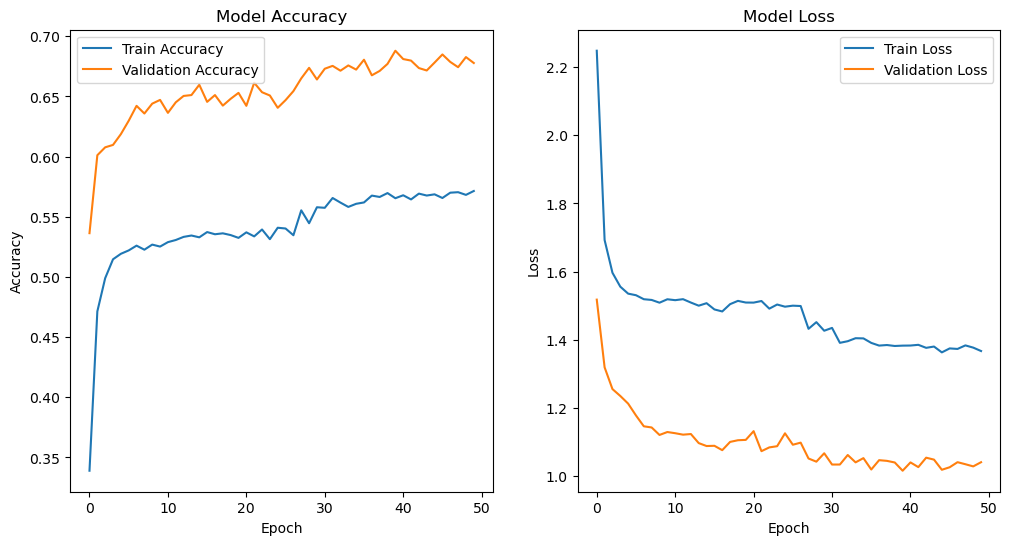

In [29]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Save the figure
plt.savefig('training_history.png')
plt.show()


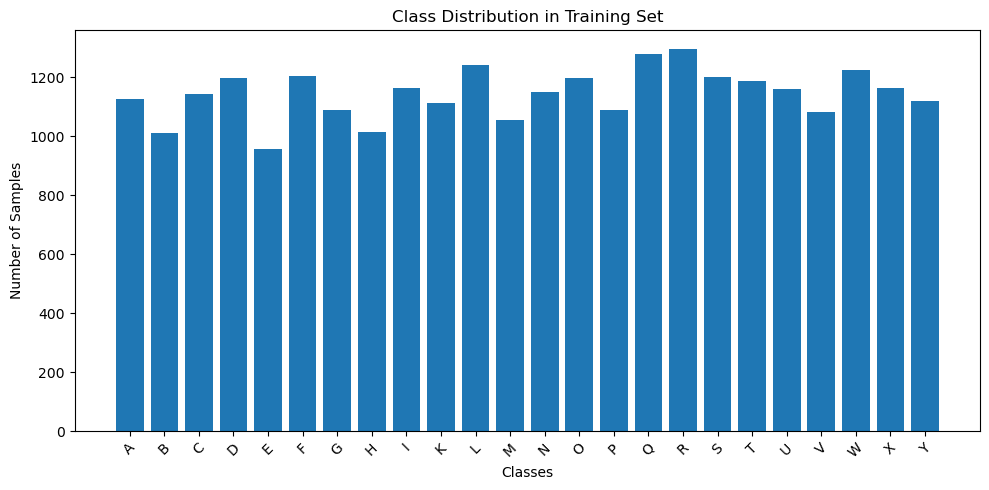

In [31]:
import os
import matplotlib.pyplot as plt

# Get class names and counts from the training directory
class_names = os.listdir(train_dir)
class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]

# Plotting the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('class_distribution.png')
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: [['keras_tensor_157']]. Received: the structure of inputs=*
  warnings.warn(


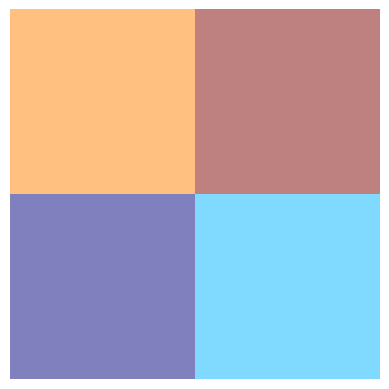

In [45]:
import cv2
import matplotlib.cm as cm
from tensorflow.keras.preprocessing import image

def get_grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([img_array]))
        loss = predictions[:, np.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]
    
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Load an example image for Grad-CAM
img_path = r'C:\Users\ASUS\Downloads\MAD\archive\Test\K\746_K.jpg'  # Replace with an actual image path
img_array = image.img_to_array(image.load_img(img_path, target_size=(64, 64))) / 255.0

# Generate the heatmap
heatmap = get_grad_cam(model, img_array, 'Conv_1')  # Use the last convolutional layer's name
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.axis('off')
plt.savefig('grad_cam_heatmap.png')
plt.show()


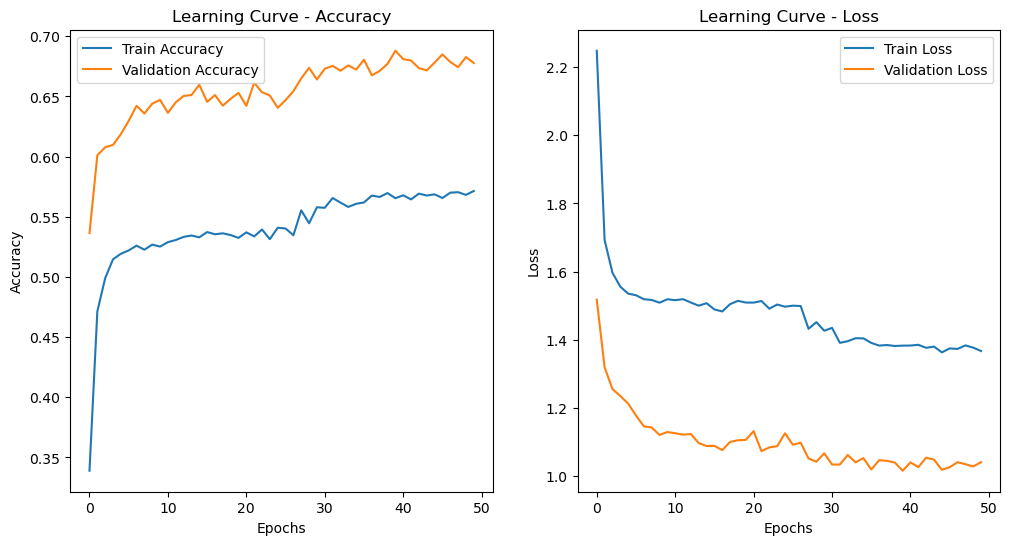

In [39]:
# Assuming history is the History object returned by model.fit
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the figure
plt.savefig('learning_curve.png')
plt.show()


NameError: name 'ImageDataGenerator' is not defined

In [15]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
import tensorflow as tf

test_datagen = image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\ASUS\Downloads\MAD\archive\Test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)

model = tf.keras.models.load_model('sign_language_final_mobilenetv2_model.keras')

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)

Found 7172 images belonging to 24 classes.


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 49s 210ms/step
              precision    recall  f1-score   support

           A       0.65      0.93      0.77       331
           B       0.83      0.52      0.64       432
           C       0.96      0.77      0.86       310
           D       0.49      0.65      0.56       245
           E       0.61      0.55      0.58       498
           F       0.71      0.74      0.73       247
           G       0.61      0.65      0.63       348
           H       0.73      0.68      0.70       436
           I       0.65      0.44      0.52       288
           K       0.51      0.69      0.59       331
           L       0.61      0.71      0.66       209
           M       0.46      0.39      0.42       394
           N       0.36      0.23      0.28       291
           O       0.72      0.96      0.82       246
           P       0.83      0.82      0.82       347
           Q       0.61      0.87      0.72       164
           R       0.34      0.23    